In [1]:
# !pip install odfpy
# !pip install seaborn
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yaml
from yaml import Loader
import numpy as np
import analyze_cells_energy as ace
import utils
from scipy.stats import ttest_ind

In [2]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'C57_MaleUrine_Exposure_cFos'
subjects = ace.list_subjects(root_directory)
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'

In [3]:
# load query file where we added volumes for each area
volumes = pd.read_csv("query_complete_with_volumes.csv")
volumes = ace.clean_volumes_database(volumes)

In [4]:
def load_subject(subject):
    df_mouse = pd.read_csv(data_directory + subject + '/cells.csv')
    df_mouse = ace.reformat_df_mouse(df=df_mouse)
    return df_mouse

In [5]:
subject = 'F1Control'

In [6]:
f1control = load_subject(subject)

In [7]:
f1control

,x_resampled,y_resampled,z_resampled,size,source,x,y,z,id,area_name
0,1718,4737,10,36,2373,140.678611,337.107642,25.589814,367,Temporal association areas layer 1
1,1758,4241,10,42,2181,136.263803,298.309612,29.250393,158,Ventral auditory area layer 2/3
2,1672,4458,12,24,1826,131.253234,316.092921,28.162763,158,Ventral auditory area layer 2/3
3,1826,4203,12,29,1850,142.307568,294.714141,29.977053,158,Ventral auditory area layer 2/3
4,1843,4220,12,22,1652,144.297862,295.899289,29.804121,158,Ventral auditory area layer 2/3
...,...,...,...,...,...,...,...,...,...,...
3127,2434,3382,730,30,3359,186.341369,228.359298,224.779737,701,Paraventricular nucleus of the thalamus
3128,2569,3652,730,33,2274,205.632175,249.678232,225.268982,703,Nucleus of reuniens
3129,2727,1147,730,42,3778,217.007073,33.169467,229.463498,1098,olfactory nerve layer of main olfactory bulb
3130,2727,5098,730,25,2357,258.875285,376.417387,211.460680,910,Tegmental reticular nucleus


In [8]:
df_cells_energy = ace.calculate_cells_energy_per_level(df_mouse=f1control, vol=volumes, level=8)

In [9]:
df_cells_energy

,area,n_cells,energy
48,Fastigial nucleus,0,0.000000
49,Interposed nucleus,0,0.000000
50,Dentate nucleus,0,0.000000
51,Vestibulocerebellar nucleus,0,0.000000
88,Claustrum,10,79656.608352
...,...,...,...
377,Nucleus prepositus,0,0.000000
378,Lateral vestibular nucleus,0,0.000000
379,Medial vestibular nucleus,0,0.000000
380,Spinal vestibular nucleus,0,0.000000


Text(0.5, 0.98, 'Cells + energy distribution - SexualImprinting - C57_MaleUrine_Exposure_cFos - F1Control')

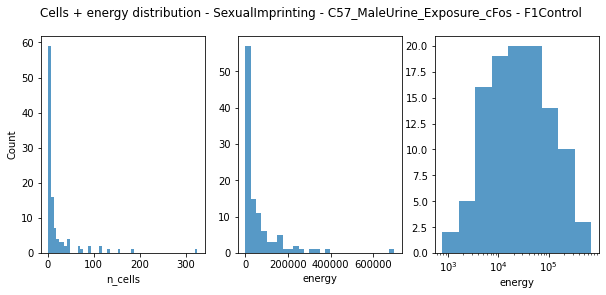

In [10]:
fig, axes = plt.subplots(1,3, figsize=[10,4])
sns.histplot(df_cells_energy[df_cells_energy.n_cells != 0]['n_cells'], ax=axes[0], edgecolor=None)
sns.histplot(df_cells_energy[df_cells_energy.energy != 0]['energy'], ax=axes[1], edgecolor=None)
sns.histplot(df_cells_energy[df_cells_energy.energy != 0]['energy'], ax=axes[2], log_scale=True, edgecolor=None)
axes[1].set_ylabel('')
axes[2].set_ylabel('')
fig.suptitle('Cells + energy distribution' + ' - ' + experiment+ ' - ' + experimental_group + ' - ' + subject)

# TODOs
- lista Aree
- lista aree nulle
- numero di cellule per area per topo / across mice
- energy dist 
- t test across areas per topo unfam vs control - fam vs control - familiar vs unfam
- rank numero di cellule per topo / across topi

# Analysis on C57

In [11]:
# TODO: this is barbaric but quick
dict_results_across_mice = {subject: ace.calculate_cells_energy_per_level(df_mouse=load_subject(subject), 
                                                                          vol=volumes, 
                                                                          level=8) for subject in subjects}

In [12]:
dict_results_across_mice['F10Control']

,area,n_cells,energy
48,Fastigial nucleus,0,0.000000
49,Interposed nucleus,0,0.000000
50,Dentate nucleus,0,0.000000
51,Vestibulocerebellar nucleus,0,0.000000
88,Claustrum,8,61309.100832
...,...,...,...
377,Nucleus prepositus,0,0.000000
378,Lateral vestibular nucleus,0,0.000000
379,Medial vestibular nucleus,0,0.000000
380,Spinal vestibular nucleus,0,0.000000


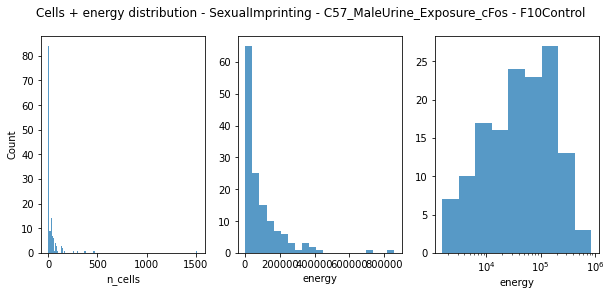

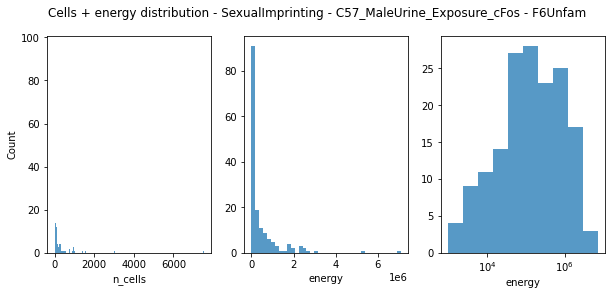

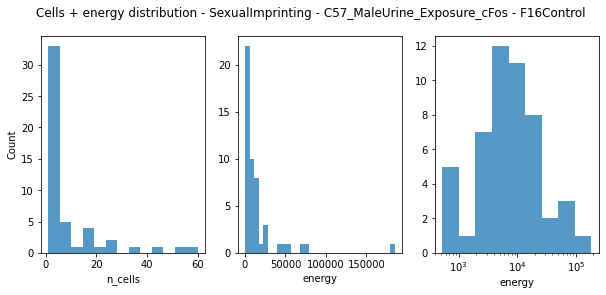

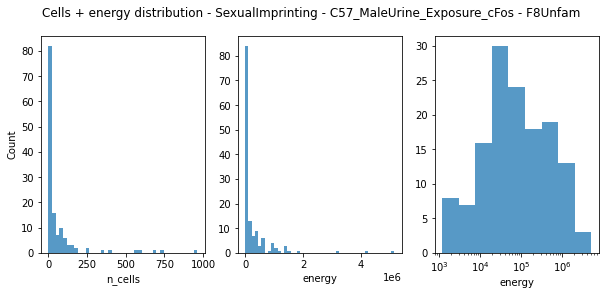

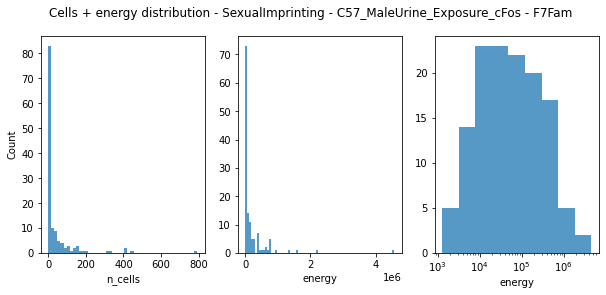

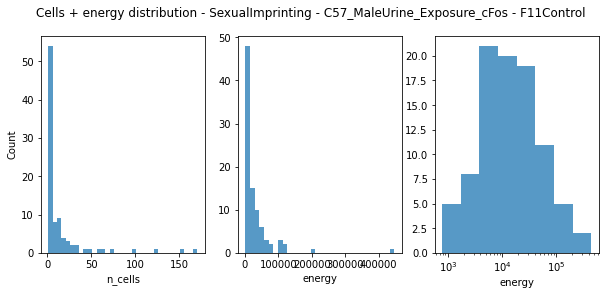

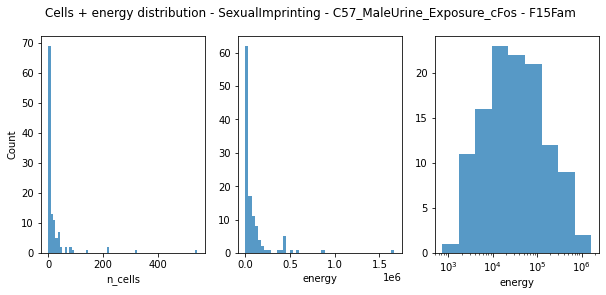

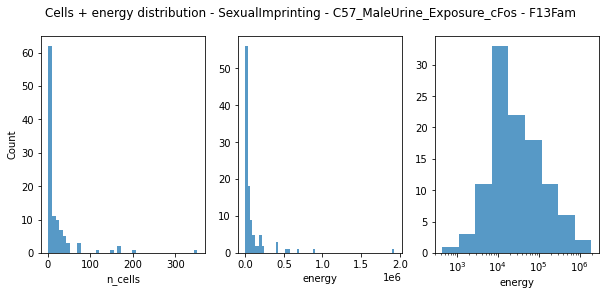

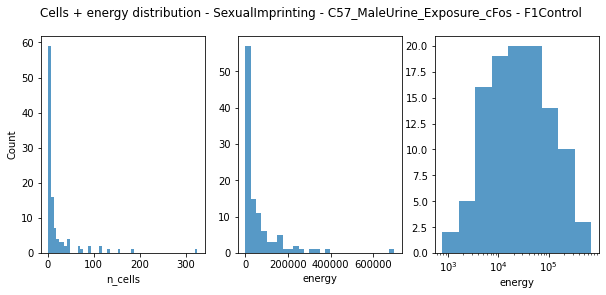

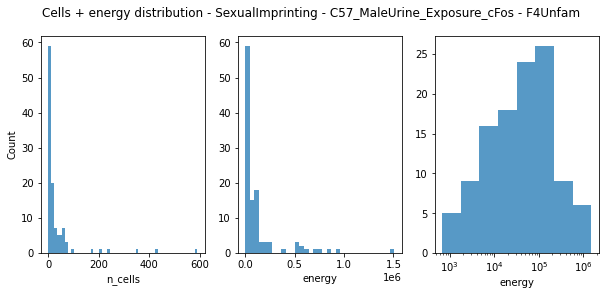

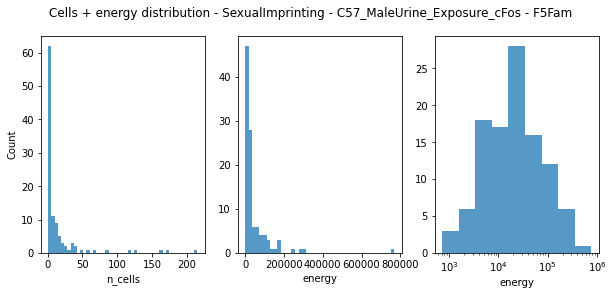

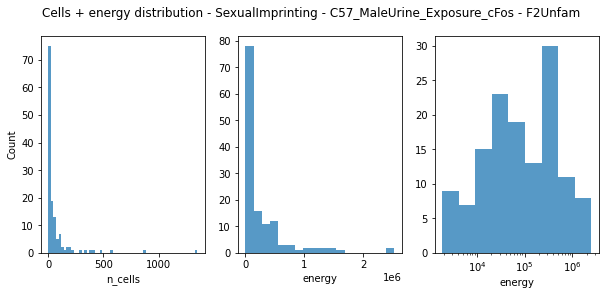

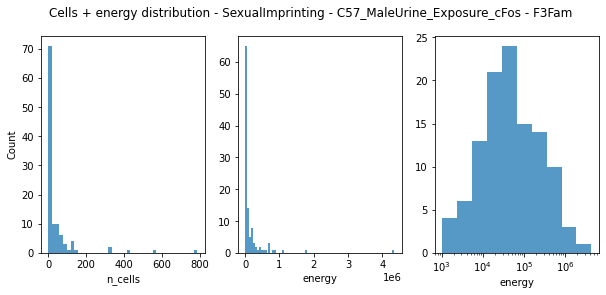

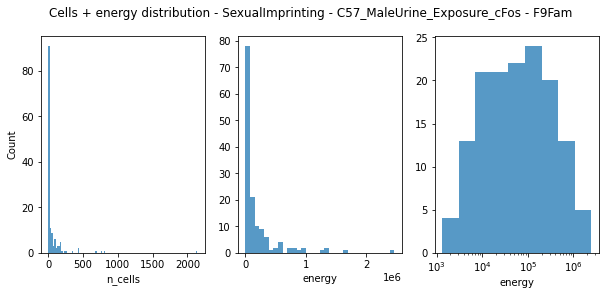

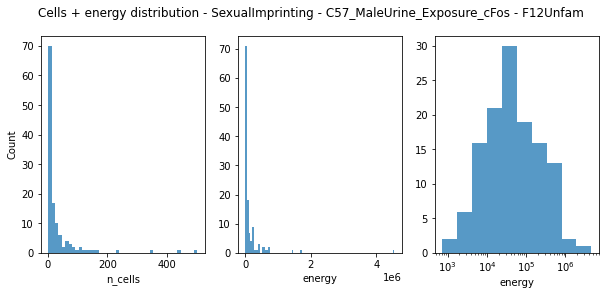

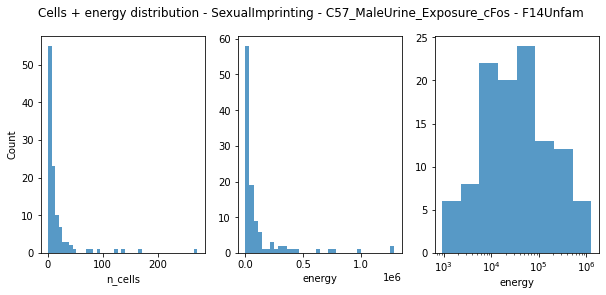

In [13]:
for subject in subjects:
    df_sub = dict_results_across_mice[subject]
    fig, axes = plt.subplots(1,3, figsize=[10,4])
    sns.histplot(df_sub[df_sub.n_cells != 0]['n_cells'], ax=axes[0], edgecolor=None)
    sns.histplot(df_sub[df_sub.energy != 0]['energy'], ax=axes[1], edgecolor=None)
    sns.histplot(df_sub[df_sub.energy != 0]['energy'], ax=axes[2], log_scale=True, edgecolor=None)
    axes[1].set_ylabel('')
    axes[2].set_ylabel('')
    fig.suptitle('Cells + energy distribution' + ' - ' + experiment+ ' - ' + experimental_group + ' - ' + subject)

# Rank areas with highest cell count

In [14]:
df_cells_energy[df_cells_energy.n_cells != 0].sort_values(by=['n_cells'], ascending=False)

,area,n_cells,energy
152,Piriform area,326,155180.879227
314,Dentate gyrus,185,151251.534339
149,Anterior olfactory nucleus,157,145717.177159
317,Entorhinal area,133,59659.523018
96,Inferior colliculus,114,146722.083455
...,...,...,...
238,Supratrigeminal nucleus,1,11982.156198
240,Motor nucleus of trigeminal,1,10751.863325
148,Accessory olfactory bulb,1,4315.889616
273,Lateral reticular nucleus,1,7208.136329


In [15]:
db_ranked_cells = {subject: dict_results_across_mice[subject][
    dict_results_across_mice[subject].n_cells != 0].sort_values(by=['n_cells'],
                                                                ascending=False) for subject in subjects}

In [16]:
subjects

['F10Control',
 'F6Unfam',
 'F16Control',
 'F8Unfam',
 'F7Fam',
 'F11Control',
 'F15Fam',
 'F13Fam',
 'F1Control',
 'F4Unfam',
 'F5Fam',
 'F2Unfam',
 'F3Fam',
 'F9Fam',
 'F12Unfam',
 'F14Unfam']

In [17]:
db_ranked_cells['F8Unfam'][0:30]

,area,n_cells,energy
147,Main olfactory bulb,964,3.985122e+05
306,Primary visual area,726,5.494924e+05
152,Piriform area,695,3.532331e+05
169,Medial amygdalar nucleus,586,1.897410e+06
154,Cortical amygdalar area,575,1.186279e+06
157,Caudoputamen,387,1.026409e+05
149,Anterior olfactory nucleus,361,3.578669e+05
92,Basomedial amygdalar nucleus,251,1.062672e+06
317,Entorhinal area,242,1.126909e+05
314,Dentate gyrus,186,1.792652e+05


# Rank areas with highest energy

In [18]:
db_ranked_energy = {subject: dict_results_across_mice[subject][
    dict_results_across_mice[subject].energy != 0].sort_values(by=['energy'],
                                                                ascending=False) for subject in subjects}

In [19]:
db_ranked_energy['F8Unfam'][0:30]

,area,n_cells,energy
206,Ventral premammillary nucleus,136,5.154997e+06
166,Bed nucleus of the accessory olfactory tract,21,4.204250e+06
193,Posterodorsal preoptic nucleus,7,3.238480e+06
169,Medial amygdalar nucleus,586,1.897410e+06
168,Intercalated amygdalar nucleus,47,1.472243e+06
204,Medial preoptic nucleus,94,1.450713e+06
217,Tuberal nucleus,114,1.417571e+06
307,Posterolateral visual area,183,1.363200e+06
154,Cortical amygdalar area,575,1.186279e+06
205,Dorsal premammillary nucleus,22,1.063204e+06


# List areas with null cell count

In [20]:
db_null_count = {subject: dict_results_across_mice[subject][
    dict_results_across_mice[subject].n_cells == 0] for subject in subjects}

<AxesSubplot:>

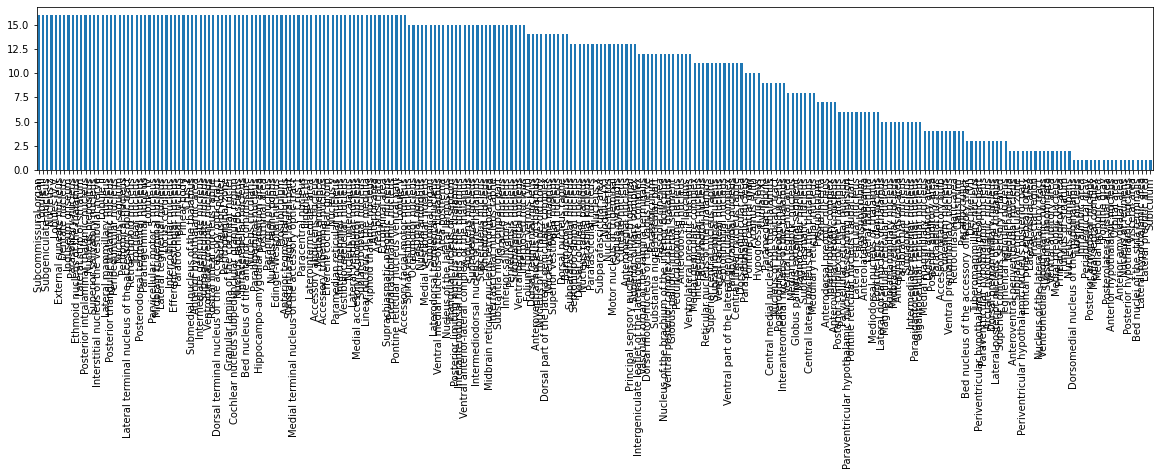

In [21]:
# make histogram of these
null_areas = [db_null_count[subjects[0]].area.values]
for subject in subjects[1:]:
    null_areas.append(db_null_count[subject].area.values)
null_areas = np.hstack(null_areas)
fig, ax = plt.subplots(1,1,figsize=(20,3))
pd.Series(null_areas).value_counts(sort=True).plot(kind='bar', axes=ax)
# plt.figure(figsize=(20,3))
# plt.hist(null_areas, bins=len())
# plt.xticks(rotation=90)

In [22]:
# print areas that are null for all mice
df = pd.DataFrame(pd.Series(null_areas).value_counts(sort=False))
df.columns = ['counts']
df = df[df.counts == 16]
print(df.to_string())

                                                       counts
Median eminence                                            16
Submedial nucleus of the thalamus                          16
Anterior hypothalamic area                                 16
Intermediate geniculate nucleus                            16
Suprageniculate nucleus                                    16
Ventromedial preoptic nucleus                              16
Rostral linear nucleus raphe                               16
Dorsal terminal nucleus of the accessory optic tract       16
Nucleus of Roller                                          16
Peritrigeminal zone                                        16
Granular lamina of the cochlear nuclei                     16
Cochlear nucleus subpedunclular granular region            16
Nucleus raphe obscurus                                     16
Infracerebellar nucleus                                    16
Bed nucleus of the anterior commissure                     16
Nucleus 

# List areas with no volume

In [23]:
db_null_volume = {subject: dict_results_across_mice[subject][
    dict_results_across_mice[subject]['energy'].isnull()] for subject in subjects}

<AxesSubplot:>

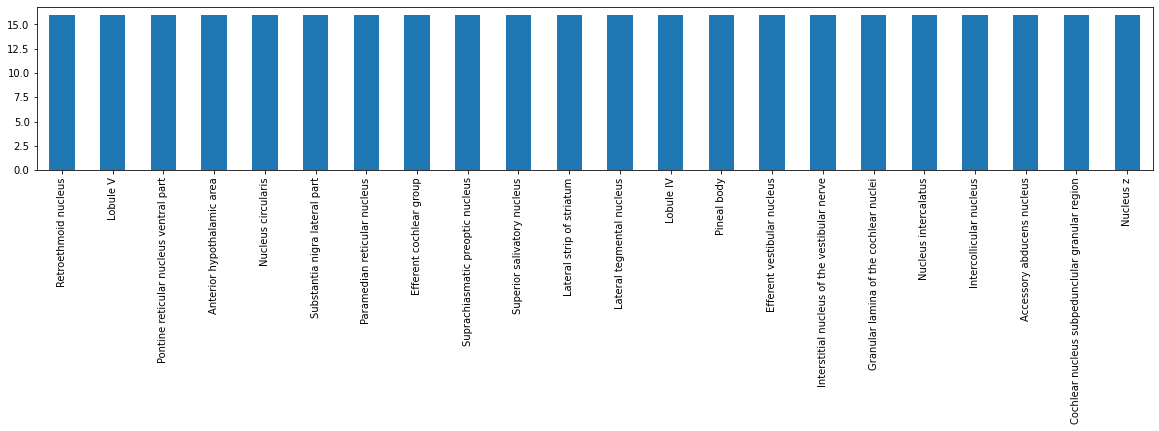

In [24]:
# make histogram of these
null_volume = [db_null_volume[subjects[0]].area.values]
for subject in subjects[1:]:
    null_volume.append(db_null_volume[subject].area.values)
null_volume = np.hstack(null_volume)
fig, ax = plt.subplots(1,1,figsize=(20,3))
pd.Series(null_volume).value_counts(sort=True).plot(kind='bar', axes=ax)

In [25]:
# print areas that are null for all mice
df = pd.DataFrame(pd.Series(null_volume).value_counts(sort=False))
df.columns = ['counts']
df = df[df.counts == 16]
print(df.to_string())

                                                 counts
Nucleus z                                            16
Pontine reticular nucleus ventral part               16
Anterior hypothalamic area                           16
Nucleus circularis                                   16
Substantia nigra lateral part                        16
Paramedian reticular nucleus                         16
Efferent cochlear group                              16
Suprachiasmatic preoptic nucleus                     16
Superior salivatory nucleus                          16
Lateral strip of striatum                            16
Lateral tegmental nucleus                            16
Lobule IV                                            16
Pineal body                                          16
Efferent vestibular nucleus                          16
Interstitial nucleus of the vestibular nerve         16
Granular lamina of the cochlear nuclei               16
Nucleus intercalatus                            

# Divide mice into experimental groups: FAM/UNFAM/CONTROL

In [26]:
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)
experimental_groups

{'Control': ['F10Control', 'F16Control', 'F11Control', 'F1Control'],
 'Unfam': ['F6Unfam', 'F8Unfam', 'F4Unfam', 'F2Unfam', 'F12Unfam', 'F14Unfam'],
 'Fam': ['F7Fam', 'F15Fam', 'F13Fam', 'F5Fam', 'F3Fam', 'F9Fam']}

# Calculate cell count across experimental groups

In [27]:
def calculate_value_across_groups(experimental_groups, dict_results_across_mice, value='n_cells'):
    """
    Value can either be n_cells or energy
    """
    df_control = pd.DataFrame()
    df_fam = pd.DataFrame()
    df_unfam = pd.DataFrame()
    for subject in experimental_groups['Control']:
        df_control['area'] = dict_results_across_mice[subject]['area']
        df_control[subject] = dict_results_across_mice[subject][value]
    for subject in experimental_groups['Fam']:
        df_fam['area'] = dict_results_across_mice[subject]['area']
        df_fam[subject] = dict_results_across_mice[subject][value]
    for subject in experimental_groups['Unfam']:
        df_unfam['area'] = dict_results_across_mice[subject]['area']
        df_unfam[subject] = dict_results_across_mice[subject][value]
    return df_control, df_fam, df_unfam

In [28]:
df_control_cell_count, df_fam_cell_count, df_unfam_cell_count = \
calculate_value_across_groups(experimental_groups=experimental_groups, 
                              dict_results_across_mice=dict_results_across_mice, 
                              value='n_cells')

In [29]:
df_control_cell_count

,area,F10Control,F16Control,F11Control,F1Control
48,Fastigial nucleus,0,0,0,0
49,Interposed nucleus,0,0,0,0
50,Dentate nucleus,0,0,0,0
51,Vestibulocerebellar nucleus,0,0,0,0
88,Claustrum,8,0,0,10
...,...,...,...,...,...
377,Nucleus prepositus,0,0,0,0
378,Lateral vestibular nucleus,0,0,0,0
379,Medial vestibular nucleus,0,0,1,0
380,Spinal vestibular nucleus,0,0,0,0


In [30]:
df_fam_cell_count

,area,F7Fam,F15Fam,F13Fam,F5Fam,F3Fam,F9Fam
48,Fastigial nucleus,0,0,0,0,0,0
49,Interposed nucleus,0,0,0,1,0,0
50,Dentate nucleus,0,0,0,0,0,0
51,Vestibulocerebellar nucleus,0,0,0,0,0,0
88,Claustrum,6,0,2,7,1,16
...,...,...,...,...,...,...,...
377,Nucleus prepositus,0,0,0,0,0,0
378,Lateral vestibular nucleus,0,0,0,0,0,0
379,Medial vestibular nucleus,0,0,0,0,0,0
380,Spinal vestibular nucleus,0,0,0,0,0,0


In [31]:
df_unfam_cell_count

,area,F6Unfam,F8Unfam,F4Unfam,F2Unfam,F12Unfam,F14Unfam
48,Fastigial nucleus,1,0,0,0,0,0
49,Interposed nucleus,0,0,0,0,0,0
50,Dentate nucleus,0,0,0,0,0,0
51,Vestibulocerebellar nucleus,0,0,0,0,0,0
88,Claustrum,20,14,3,25,9,0
...,...,...,...,...,...,...,...
377,Nucleus prepositus,0,0,0,0,0,0
378,Lateral vestibular nucleus,0,0,0,0,0,0
379,Medial vestibular nucleus,0,0,0,0,0,0
380,Spinal vestibular nucleus,0,0,0,2,0,0


## Calculate t-tests across groups per area

In [32]:
def ttest_across_groups(df_control, df_fam, df_unfam):
    df_ttest = pd.DataFrame(columns=['area', 'pval_Control_vs_Fam', 
                                     'pval_Control_vs_Unfam', 'pval_Fam_vs_Unfam'])
    df_ttest['area'] = df_control['area']
    # loop over areas
    for area in df_control['area'].values:
        # compare control and fam
        pval_control_fam = ttest_ind(df_control[df_control['area'] == area].values[0][1:],
             df_fam[df_fam['area'] == area].values[0][1:])
        # assign pvalue to dataframe
        df_ttest['pval_Control_vs_Fam'][df_ttest.loc[df_ttest['area'] == area].index[0]] = pval_control_fam[1]

        # compare control and unfam
        pval_control_unfam = ttest_ind(df_control[df_control['area'] == area].values[0][1:],
             df_unfam[df_unfam['area'] == area].values[0][1:])
        # assign pvalue to dataframe
        df_ttest['pval_Control_vs_Unfam'][df_ttest.loc[df_ttest['area'] == area].index[0]] = pval_control_unfam[1]

        # compare fam and unfam
        pval_fam_unfam = ttest_ind(df_fam[df_fam['area'] == area].values[0][1:],
             df_unfam[df_unfam['area'] == area].values[0][1:])
        # assign pvalue to dataframe
        df_ttest['pval_Fam_vs_Unfam'][df_ttest.loc[df_ttest['area'] == area].index[0]] = pval_fam_unfam[1]
    return df_ttest


In [33]:
df_ttest_ncells = ttest_across_groups(df_control=df_control_cell_count, 
                               df_fam=df_fam_cell_count, 
                               df_unfam=df_unfam_cell_count)
df_ttest_ncells

,area,pval_Control_vs_Fam,pval_Control_vs_Unfam,pval_Fam_vs_Unfam
48,Fastigial nucleus,NaN,0.446813,0.340893
49,Interposed nucleus,0.446813,NaN,0.340893
50,Dentate nucleus,NaN,NaN,NaN
51,Vestibulocerebellar nucleus,NaN,NaN,NaN
88,Claustrum,0.825978,0.209279,0.191603
...,...,...,...,...
377,Nucleus prepositus,NaN,NaN,NaN
378,Lateral vestibular nucleus,NaN,NaN,NaN
379,Medial vestibular nucleus,0.241504,0.241504,NaN
380,Spinal vestibular nucleus,NaN,0.446813,0.340893


In [34]:
# remove rows corresponding to area that have zero cell count across all experimental groups
df_ttest_not_null_ncells = df_ttest_ncells.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])
df_ttest_not_null_ncells

,area,pval_Control_vs_Fam,pval_Control_vs_Unfam,pval_Fam_vs_Unfam
48,Fastigial nucleus,NaN,0.446813,0.340893
49,Interposed nucleus,0.446813,NaN,0.340893
88,Claustrum,0.825978,0.209279,0.191603
89,Endopiriform nucleus,0.286819,0.198355,0.442438
90,Lateral amygdalar nucleus,0.85626,0.368446,0.305405
...,...,...,...,...
373,Cuneate nucleus,0.149578,0.203895,0.340893
374,Gracile nucleus,0.446813,NaN,0.340893
379,Medial vestibular nucleus,0.241504,0.241504,NaN
380,Spinal vestibular nucleus,NaN,0.446813,0.340893


In [35]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']][0:20].set_index('area')

,pval_Control_vs_Fam
area,
Medial preoptic nucleus,0.00262871
Cortical amygdalar area,0.006737
Medial amygdalar nucleus,0.0086571
Bed nuclei of the stria terminalis,0.0208919
Bed nucleus of the accessory olfactory tract,0.0239483
Tuberal nucleus,0.0263196
Intercalated amygdalar nucleus,0.0320833
Fasciola cinerea,0.0352652
Ventromedial hypothalamic nucleus,0.0380056


In [36]:
# sort dataframe pvalues of control vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']][0:20].set_index('area')

,pval_Control_vs_Unfam
area,
Cortical amygdalar area,0.00460707
Medial preoptic nucleus,0.00881791
Periventricular hypothalamic nucleus posterior part,0.010056
Medial amygdalar nucleus,0.0103031
Bed nuclei of the stria terminalis,0.0182939
Posterior amygdalar nucleus,0.0210745
Ventromedial hypothalamic nucleus,0.0221525
Nucleus of the solitary tract,0.0231052
Anterior amygdalar area,0.028484


In [53]:
# sort dataframe pvalues of fam vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Fam_vs_Unfam')[['area', 'pval_Fam_vs_Unfam']][0:20].set_index('area')

,pval_Fam_vs_Unfam
area,
Fasciola cinerea,0.0101196
Simple lobule,0.0134385
Posterior hypothalamic nucleus,0.0153221
Supramammillary nucleus,0.0217184
Posterodorsal preoptic nucleus,0.024491
Medial preoptic nucleus,0.0343519
Medial mammillary nucleus,0.050643
Dorsal premammillary nucleus,0.0527809
Dorsomedial nucleus of the hypothalamus,0.056834


## Code to calculate cross corr matrix

In [97]:
def cross_corr(df):
    # remove areas where no cells have been detected in any mouse
    # and remove rows with all nans
    corr_matrix = df.set_index('area').loc[
        ~(df.set_index('area')==0).all(axis=1)].dropna(axis=0).T.corr(method='pearson')
    return corr_matrix

## Calculate cross corr across groups per area on cell count

In [117]:
corr_matrix_control_ncells = cross_corr(df_control_cell_count)
corr_matrix_control_ncells

area,Claustrum,Endopiriform nucleus,Lateral amygdalar nucleus,Basolateral amygdalar nucleus,Basomedial amygdalar nucleus,Posterior amygdalar nucleus,Superior colliculus sensory related,Inferior colliculus,Nucleus of the brachium of the inferior colliculus,Substantia nigra reticular part,...,Intergeniculate leaflet of the lateral geniculate complex,Ventral part of the lateral geniculate complex,Medial habenula,Lateral habenula,Medial mammillary nucleus,Supramammillary nucleus,Tuberomammillary nucleus,Cuneate nucleus,Medial vestibular nucleus,Superior vestibular nucleus
area,,,,,,,,,,,,,,,,,,,,,
Claustrum,1.000000,0.528328,0.508278,0.585957,0.775286,0.662651,0.620920,0.998259,0.959760,-0.570352,...,-0.109764,0.443607,0.491171,0.697097,0.443607,0.443607,0.443607,-0.505813,-0.570352,0.697097
Endopiriform nucleus,0.528328,1.000000,0.901157,0.978855,0.944978,0.981181,0.875190,0.539758,0.269521,-0.436694,...,0.584472,0.992486,0.998817,-0.238197,0.992486,0.992486,0.992486,-0.125078,-0.317595,-0.238197
Lateral amygdalar nucleus,0.508278,0.901157,1.000000,0.966279,0.879597,0.930244,0.988483,0.542914,0.289775,-0.756650,...,0.786334,0.857537,0.908239,-0.151330,0.857537,0.857537,0.857537,0.233095,0.050443,-0.151330
Basolateral amygdalar nucleus,0.585957,0.978855,0.966279,1.000000,0.958172,0.991430,0.955637,0.607139,0.346362,-0.611215,...,0.653213,0.949334,0.978464,-0.143050,0.949334,0.949334,0.949334,-0.005463,-0.195069,-0.143050
Basomedial amygdalar nucleus,0.775286,0.944978,0.879597,0.958172,1.000000,0.985771,0.903969,0.785187,0.568544,-0.572018,...,0.415482,0.904158,0.930696,0.092261,0.904158,0.904158,0.904158,-0.255799,-0.424400,0.092261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Supramammillary nucleus,0.443607,0.992486,0.857537,0.949334,0.904158,0.950586,0.816497,0.451422,0.174078,-0.333333,...,0.577350,1.000000,0.993661,-0.333333,1.000000,1.000000,1.000000,-0.140028,-0.333333,-0.333333
Tuberomammillary nucleus,0.443607,0.992486,0.857537,0.949334,0.904158,0.950586,0.816497,0.451422,0.174078,-0.333333,...,0.577350,1.000000,0.993661,-0.333333,1.000000,1.000000,1.000000,-0.140028,-0.333333,-0.333333
Cuneate nucleus,-0.505813,-0.125078,0.233095,-0.005463,-0.255799,-0.133109,0.171499,-0.454127,-0.511891,-0.420084,...,0.727607,-0.140028,-0.083484,-0.420084,-0.140028,-0.140028,-0.140028,1.000000,0.980196,-0.420084


In [118]:
corr_matrix_fam_ncells = cross_corr(df_fam_cell_count)
corr_matrix_fam_ncells

area,Interposed nucleus,Claustrum,Endopiriform nucleus,Lateral amygdalar nucleus,Basolateral amygdalar nucleus,Basomedial amygdalar nucleus,Posterior amygdalar nucleus,Superior colliculus sensory related,Inferior colliculus,Substantia nigra reticular part,...,Intergeniculate leaflet of the lateral geniculate complex,Ventral part of the lateral geniculate complex,Medial habenula,Lateral habenula,Medial mammillary nucleus,Supramammillary nucleus,Tuberomammillary nucleus,Dorsal cochlear nucleus,Ventral cochlear nucleus,Gracile nucleus
area,,,,,,,,,,,,,,,,,,,,,
Interposed nucleus,1.000000,0.137882,-0.248545,-0.739076,-0.459051,-0.396027,-0.411145,-0.376956,-0.097308,-0.400000,...,-0.200000,-0.292770,-0.316228,0.923950,-0.453535,-0.392792,-0.447214,-0.316228,0.979796,-0.200000
Claustrum,0.137882,1.000000,0.920565,0.381552,0.707988,0.814135,0.715608,0.844600,0.960931,0.730774,...,-0.275764,0.726618,0.719434,0.396542,-0.360492,-0.234689,-0.472747,0.348817,0.084435,-0.275764
Endopiriform nucleus,-0.248545,0.920565,1.000000,0.676987,0.904925,0.962294,0.824478,0.959205,0.982468,0.891487,...,-0.248545,0.769058,0.797733,0.037864,-0.121697,-0.036050,-0.360525,0.425928,-0.304404,-0.248545
Lateral amygdalar nucleus,-0.739076,0.381552,0.676987,1.000000,0.834153,0.841440,0.722642,0.647905,0.536067,0.893766,...,-0.223442,0.478047,0.679408,-0.591611,0.538791,0.596359,-0.140921,0.298940,-0.799926,-0.223442
Basolateral amygdalar nucleus,-0.459051,0.707988,0.904925,0.834153,1.000000,0.952746,0.668548,0.840012,0.852890,0.934666,...,-0.359669,0.512646,0.643514,-0.194303,0.244936,0.254047,-0.447978,0.284343,-0.541934,-0.359669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Supramammillary nucleus,-0.392792,-0.234689,-0.036050,0.596359,0.254047,0.205478,0.025810,-0.185082,-0.161820,0.392792,...,-0.130931,-0.191663,0.000000,-0.553752,0.960586,1.000000,-0.227710,-0.414039,-0.427618,-0.130931
Tuberomammillary nucleus,-0.447214,-0.472747,-0.360525,-0.140921,-0.447978,-0.376826,0.025188,-0.126435,-0.421000,-0.447214,...,0.745356,0.218218,-0.078567,-0.552877,-0.218735,-0.227710,1.000000,0.235702,-0.304290,0.745356
Dorsal cochlear nucleus,-0.316228,0.348817,0.425928,0.298940,0.284343,0.413008,0.685698,0.610920,0.371378,0.316228,...,-0.316228,0.462910,0.750000,-0.020576,-0.464007,-0.414039,0.235702,1.000000,-0.387298,-0.316228


In [119]:
corr_matrix_unfam_ncells = cross_corr(df_unfam_cell_count)
corr_matrix_unfam_ncells

area,Fastigial nucleus,Claustrum,Endopiriform nucleus,Lateral amygdalar nucleus,Basolateral amygdalar nucleus,Basomedial amygdalar nucleus,Posterior amygdalar nucleus,Superior colliculus sensory related,Inferior colliculus,Nucleus of the brachium of the inferior colliculus,...,Medial habenula,Lateral habenula,Medial mammillary nucleus,Supramammillary nucleus,Tuberomammillary nucleus,Dorsal cochlear nucleus,Ventral cochlear nucleus,Cuneate nucleus,Spinal vestibular nucleus,Superior vestibular nucleus
area,,,,,,,,,,,,,,,,,,,,,
Fastigial nucleus,1.000000,0.412289,0.950023,0.753992,0.940247,0.644155,0.563491,0.517153,0.070789,0.632456,...,5.855400e-01,0.285931,0.779911,0.272624,-0.128554,-0.200000,-0.171686,1.000000,-0.200000,-0.200000
Claustrum,0.412289,1.000000,0.609418,0.225384,0.567747,0.599779,0.764619,0.926381,0.624760,0.212861,...,2.832893e-01,-0.021871,0.422356,0.906403,0.283550,0.664711,0.684863,0.412289,0.664711,-0.445945
Endopiriform nucleus,0.950023,0.609418,1.000000,0.789120,0.994680,0.831476,0.777001,0.741005,0.369463,0.507950,...,5.582885e-01,0.190792,0.873036,0.530590,0.147811,-0.060128,-0.035930,0.950023,-0.060128,-0.281743
Lateral amygdalar nucleus,0.753992,0.225384,0.789120,1.000000,0.824440,0.720222,0.682410,0.397490,0.248552,0.345101,...,7.358208e-01,0.170203,0.685944,0.259802,0.258719,-0.436522,-0.425823,0.753992,-0.436522,0.238103
Basolateral amygdalar nucleus,0.940247,0.567747,0.994680,0.824440,1.000000,0.860356,0.769648,0.723307,0.388391,0.518630,...,5.344746e-01,0.237654,0.889898,0.497197,0.204089,-0.141742,-0.118201,0.940247,-0.141742,-0.279774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dorsal cochlear nucleus,-0.200000,0.664711,-0.060128,-0.436522,-0.141742,-0.074530,0.277329,0.451828,0.310858,-0.316228,...,-1.625200e-17,-0.493881,-0.182532,0.664280,-0.018365,1.000000,0.998903,-0.200000,1.000000,-0.200000
Ventral cochlear nucleus,-0.171686,0.684863,-0.035930,-0.425823,-0.118201,-0.066680,0.280664,0.465607,0.299996,-0.271460,...,1.142379e-02,-0.457435,-0.174821,0.665529,-0.037263,0.998903,1.000000,-0.171686,0.998903,-0.218510
Cuneate nucleus,1.000000,0.412289,0.950023,0.753992,0.940247,0.644155,0.563491,0.517153,0.070789,0.632456,...,5.855400e-01,0.285931,0.779911,0.272624,-0.128554,-0.200000,-0.171686,1.000000,-0.200000,-0.200000


## Plot cross corr matrix across groups per area on cell count

Text(0.5, 1.0, 'CONTROL')

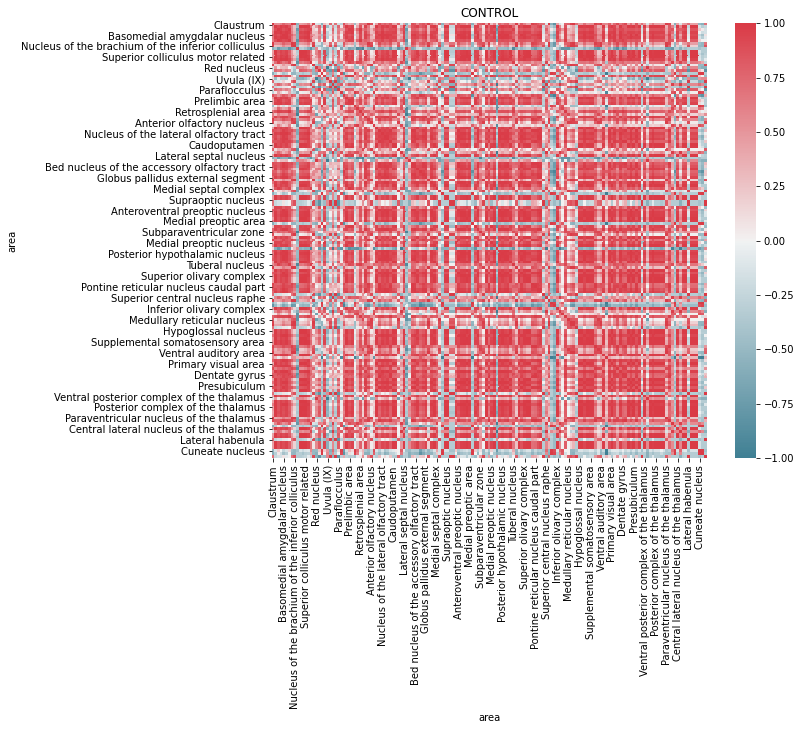

In [120]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_control_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('CONTROL')

Text(0.5, 1.0, 'FAM')

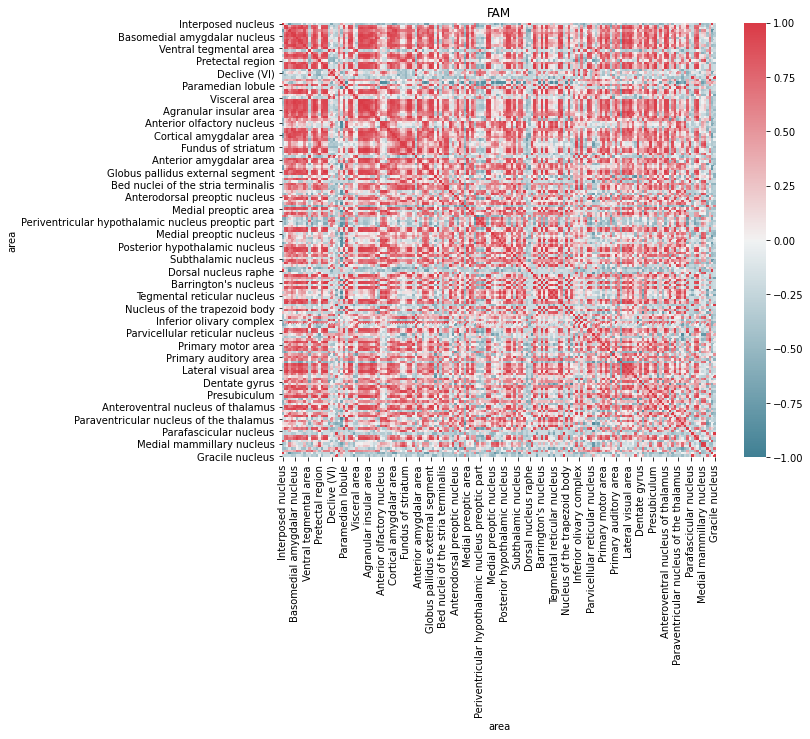

In [121]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_fam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('FAM')

Text(0.5, 1.0, 'UNFAM')

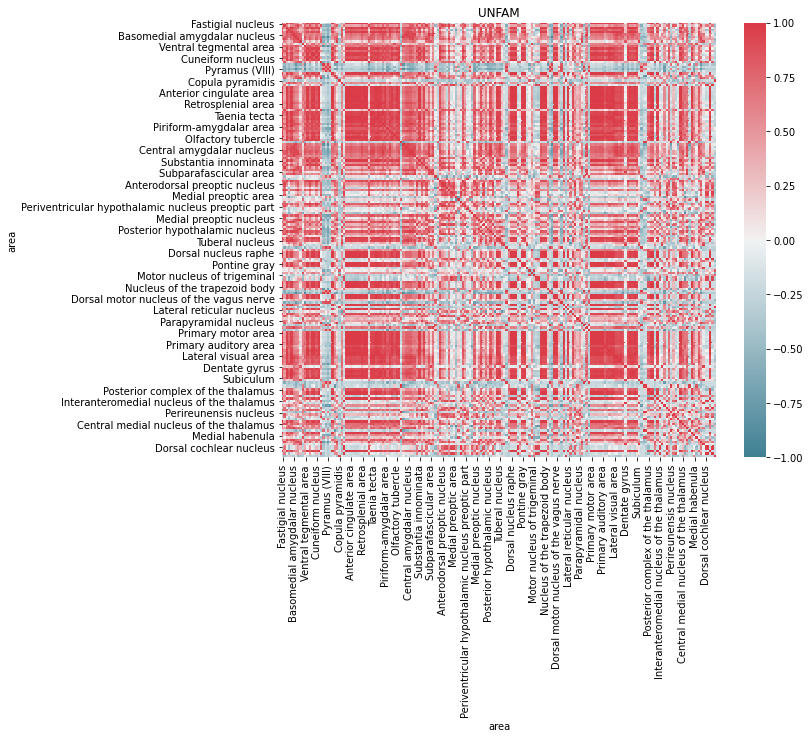

In [122]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_unfam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('UNFAM')

# Calculate energy across experimental groups

In [104]:
df_control_energy, df_fam_energy, df_unfam_energy = \
calculate_value_across_groups(experimental_groups, dict_results_across_mice, value='energy')

In [105]:
df_control_energy

,area,F10Control,F16Control,F11Control,F1Control
48,Fastigial nucleus,0.000000,0.0,0.000000,0.000000
49,Interposed nucleus,0.000000,0.0,0.000000,0.000000
50,Dentate nucleus,0.000000,0.0,0.000000,0.000000
51,Vestibulocerebellar nucleus,0.000000,0.0,0.000000,0.000000
88,Claustrum,61309.100832,0.0,0.000000,79656.608352
...,...,...,...,...,...
377,Nucleus prepositus,0.000000,0.0,0.000000,0.000000
378,Lateral vestibular nucleus,0.000000,0.0,0.000000,0.000000
379,Medial vestibular nucleus,0.000000,0.0,4753.907832,0.000000
380,Spinal vestibular nucleus,0.000000,0.0,0.000000,0.000000


In [46]:
df_fam_energy

,area,F7Fam,F15Fam,F13Fam,F5Fam,F3Fam,F9Fam
48,Fastigial nucleus,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
49,Interposed nucleus,0.000000,0.0,0.000000,3644.054341,0.000000,0.000000
50,Dentate nucleus,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
51,Vestibulocerebellar nucleus,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
88,Claustrum,49049.560803,0.0,13737.829264,44774.302734,5080.906701,128949.383837
...,...,...,...,...,...,...,...
377,Nucleus prepositus,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
378,Lateral vestibular nucleus,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
379,Medial vestibular nucleus,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
380,Spinal vestibular nucleus,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [106]:
df_unfam_energy

,area,F6Unfam,F8Unfam,F4Unfam,F2Unfam,F12Unfam,F14Unfam
48,Fastigial nucleus,6674.739175,0.000000,0.000000,0.000000,0.000000,0.0
49,Interposed nucleus,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50,Dentate nucleus,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
51,Vestibulocerebellar nucleus,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
88,Claustrum,146951.070482,98498.145693,20992.467179,190440.895680,56121.787708,0.0
...,...,...,...,...,...,...,...
377,Nucleus prepositus,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
378,Lateral vestibular nucleus,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
379,Medial vestibular nucleus,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
380,Spinal vestibular nucleus,0.000000,0.000000,0.000000,20870.569733,0.000000,0.0


In [107]:
df_ttest_energy = ttest_across_groups(df_control=df_control_energy,
                                      df_fam=df_fam_energy,
                                      df_unfam=df_unfam_energy)
df_ttest_energy

,area,pval_Control_vs_Fam,pval_Control_vs_Unfam,pval_Fam_vs_Unfam
48,Fastigial nucleus,NaN,0.446813,0.340893
49,Interposed nucleus,0.446813,NaN,0.340893
50,Dentate nucleus,NaN,NaN,NaN
51,Vestibulocerebellar nucleus,NaN,NaN,NaN
88,Claustrum,0.868817,0.256154,0.237129
...,...,...,...,...
377,Nucleus prepositus,NaN,NaN,NaN
378,Lateral vestibular nucleus,NaN,NaN,NaN
379,Medial vestibular nucleus,0.241504,0.241504,NaN
380,Spinal vestibular nucleus,NaN,0.446813,0.340893


In [108]:
# remove rows corresponding to area that have zero cell count across all experimental groups
df_ttest_not_null_energy = df_ttest_energy.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])
df_ttest_not_null_energy

,area,pval_Control_vs_Fam,pval_Control_vs_Unfam,pval_Fam_vs_Unfam
48,Fastigial nucleus,NaN,0.446813,0.340893
49,Interposed nucleus,0.446813,NaN,0.340893
88,Claustrum,0.868817,0.256154,0.237129
89,Endopiriform nucleus,0.297035,0.192528,0.481836
90,Lateral amygdalar nucleus,0.892731,0.334298,0.260675
...,...,...,...,...
373,Cuneate nucleus,0.145877,0.193705,0.340893
374,Gracile nucleus,0.446813,NaN,0.340893
379,Medial vestibular nucleus,0.241504,0.241504,NaN
380,Spinal vestibular nucleus,NaN,0.446813,0.340893


In [109]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_energy.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']][0:20].set_index('area')

,pval_Control_vs_Fam
area,
Medial preoptic nucleus,0.00475805
Medial amygdalar nucleus,0.0167212
Cortical amygdalar area,0.0187642
Bed nuclei of the stria terminalis,0.0255039
Tuberal nucleus,0.0277758
Bed nucleus of the accessory olfactory tract,0.037427
Fasciola cinerea,0.0393707
Ventromedial hypothalamic nucleus,0.0450243
Posterior auditory area,0.0451783


In [110]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_energy.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']][0:20].set_index('area')

,pval_Control_vs_Unfam
area,
Medial preoptic nucleus,0.0082575
Cortical amygdalar area,0.0147569
Medial amygdalar nucleus,0.0199332
Periventricular hypothalamic nucleus posterior part,0.0253272
Bed nuclei of the stria terminalis,0.0255449
Anteroventral periventricular nucleus,0.0283798
Ventromedial hypothalamic nucleus,0.030372
Anterior amygdalar area,0.0335083
Nucleus of the solitary tract,0.034465


In [111]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_energy.sort_values(by='pval_Fam_vs_Unfam')[['area', 'pval_Fam_vs_Unfam']][0:20].set_index('area')

,pval_Fam_vs_Unfam
area,
Fasciola cinerea,0.0117615
Simple lobule,0.0168505
Posterior hypothalamic nucleus,0.0202964
Medial preoptic nucleus,0.0207758
Posterodorsal preoptic nucleus,0.0253749
Supramammillary nucleus,0.025427
Medial septal complex,0.0441099
Medial mammillary nucleus,0.0445573
Dorsomedial nucleus of the hypothalamus,0.0506741


## Calculate cross corr matrix across experimental groups on energy

In [112]:
corr_matrix_control_energy = cross_corr(df_control_energy)
corr_matrix_control_energy

area,Claustrum,Endopiriform nucleus,Lateral amygdalar nucleus,Basolateral amygdalar nucleus,Basomedial amygdalar nucleus,Posterior amygdalar nucleus,Superior colliculus sensory related,Inferior colliculus,Nucleus of the brachium of the inferior colliculus,Substantia nigra reticular part,...,Intergeniculate leaflet of the lateral geniculate complex,Ventral part of the lateral geniculate complex,Medial habenula,Lateral habenula,Medial mammillary nucleus,Supramammillary nucleus,Tuberomammillary nucleus,Cuneate nucleus,Medial vestibular nucleus,Superior vestibular nucleus
area,,,,,,,,,,,,,,,,,,,,,
Claustrum,1.000000,0.501068,0.494959,0.633531,0.747957,0.687931,0.467088,0.999131,0.970148,-0.567811,...,-0.025724,0.420003,0.439753,0.715619,0.420003,0.420003,0.420003,-0.504121,-0.567811,0.715619
Endopiriform nucleus,0.501068,1.000000,0.895437,0.971389,0.948110,0.968424,0.865345,0.484472,0.276671,-0.420258,...,0.702480,0.994199,0.996192,-0.244651,0.994199,0.994199,0.994199,-0.125951,-0.329289,-0.244651
Lateral amygdalar nucleus,0.494959,0.895437,1.000000,0.952353,0.883811,0.917455,0.997772,0.497032,0.306028,-0.755533,...,0.854140,0.859593,0.912109,-0.147397,0.859593,0.859593,0.859593,0.236140,0.043337,-0.147397
Basolateral amygdalar nucleus,0.633531,0.971389,0.952353,1.000000,0.981233,0.994649,0.930208,0.625066,0.434337,-0.612575,...,0.701788,0.940723,0.964979,-0.065880,0.940723,0.940723,0.940723,-0.067313,-0.262268,-0.065880
Basomedial amygdalar nucleus,0.747957,0.948110,0.883811,0.981233,1.000000,0.995500,0.852967,0.736452,0.565931,-0.561481,...,0.551263,0.911755,0.925039,0.075291,0.911755,0.911755,0.911755,-0.245492,-0.425565,0.075291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Supramammillary nucleus,0.420003,0.994199,0.859593,0.940723,0.911755,0.936661,0.827639,0.400550,0.187378,-0.333333,...,0.704982,1.000000,0.993473,-0.333333,1.000000,1.000000,1.000000,-0.128919,-0.333333,-0.333333
Tuberomammillary nucleus,0.420003,0.994199,0.859593,0.940723,0.911755,0.936661,0.827639,0.400550,0.187378,-0.333333,...,0.704982,1.000000,0.993473,-0.333333,1.000000,1.000000,1.000000,-0.128919,-0.333333,-0.333333
Cuneate nucleus,-0.504121,-0.125951,0.236140,-0.067313,-0.245492,-0.168594,0.296587,-0.474691,-0.511202,-0.424498,...,0.612421,-0.128919,-0.044744,-0.424498,-0.128919,-0.128919,-0.128919,1.000000,0.977914,-0.424498


In [113]:
corr_matrix_fam_energy = cross_corr(df_fam_energy)
corr_matrix_fam_energy

area,Interposed nucleus,Claustrum,Endopiriform nucleus,Lateral amygdalar nucleus,Basolateral amygdalar nucleus,Basomedial amygdalar nucleus,Posterior amygdalar nucleus,Superior colliculus sensory related,Inferior colliculus,Substantia nigra reticular part,...,Intergeniculate leaflet of the lateral geniculate complex,Ventral part of the lateral geniculate complex,Medial habenula,Lateral habenula,Medial mammillary nucleus,Supramammillary nucleus,Tuberomammillary nucleus,Dorsal cochlear nucleus,Ventral cochlear nucleus,Gracile nucleus
area,,,,,,,,,,,,,,,,,,,,,
Interposed nucleus,1.000000,0.046009,-0.237470,-0.635651,-0.428081,-0.308590,-0.354472,-0.381335,-0.067414,-0.411932,...,-0.200000,-0.298455,-0.348896,0.921687,-0.439219,-0.386536,-0.451966,-0.315988,0.979253,-0.200000
Claustrum,0.046009,1.000000,0.958435,0.663203,0.827018,0.909152,0.812533,0.889502,0.983091,0.756569,...,-0.270683,0.724046,0.710302,0.349091,-0.350480,-0.204635,-0.401975,0.423378,-0.009026,-0.270683
Endopiriform nucleus,-0.237470,0.958435,1.000000,0.831548,0.937996,0.975953,0.881073,0.967039,0.976857,0.871823,...,-0.236512,0.764006,0.781708,0.079277,-0.185412,-0.062361,-0.295740,0.484955,-0.291282,-0.236512
Lateral amygdalar nucleus,-0.635651,0.663203,0.831548,1.000000,0.910139,0.913031,0.876683,0.832023,0.701718,0.903961,...,-0.243481,0.649750,0.803779,-0.388359,0.243724,0.366375,-0.063636,0.512932,-0.699113,-0.243481
Basolateral amygdalar nucleus,-0.428081,0.827018,0.937996,0.910139,1.000000,0.952348,0.789864,0.902656,0.888183,0.978392,...,-0.349785,0.581782,0.715032,-0.129350,0.119573,0.186574,-0.367702,0.399454,-0.509250,-0.349785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Supramammillary nucleus,-0.386536,-0.204635,-0.062361,0.366375,0.186574,0.115692,0.014686,-0.174960,-0.174563,0.367143,...,-0.131758,-0.171088,-0.115507,-0.540585,0.951667,1.000000,-0.012824,-0.381340,-0.421756,-0.131758
Tuberomammillary nucleus,-0.451966,-0.401975,-0.295740,-0.063636,-0.367702,-0.278831,0.022317,-0.140148,-0.411018,-0.426420,...,0.822509,0.338578,-0.066991,-0.609397,-0.054712,-0.012824,1.000000,0.078146,-0.291171,0.822509
Dorsal cochlear nucleus,-0.315988,0.423378,0.484955,0.512932,0.399454,0.501463,0.692076,0.622540,0.389875,0.274585,...,-0.315988,0.466975,0.890531,-0.005578,-0.473714,-0.381340,0.078146,1.000000,-0.387856,-0.315988


In [114]:
corr_matrix_unfam_energy = cross_corr(df_unfam_energy)
corr_matrix_unfam_energy

area,Fastigial nucleus,Claustrum,Endopiriform nucleus,Lateral amygdalar nucleus,Basolateral amygdalar nucleus,Basomedial amygdalar nucleus,Posterior amygdalar nucleus,Superior colliculus sensory related,Inferior colliculus,Nucleus of the brachium of the inferior colliculus,...,Medial habenula,Lateral habenula,Medial mammillary nucleus,Supramammillary nucleus,Tuberomammillary nucleus,Dorsal cochlear nucleus,Ventral cochlear nucleus,Cuneate nucleus,Spinal vestibular nucleus,Superior vestibular nucleus
area,,,,,,,,,,,,,,,,,,,,,
Fastigial nucleus,1.000000,0.407469,0.935606,0.739762,0.932092,0.602150,0.585980,0.442756,0.011731,0.817565,...,0.534875,0.454894,0.767276,0.196397,-0.159148,-0.200000,-0.195014,1.000000,-0.200000,-0.200000
Claustrum,0.407469,1.000000,0.623263,0.293492,0.560407,0.545737,0.733940,0.912022,0.602762,0.266536,...,0.176449,-0.000080,0.381979,0.883932,0.262479,0.695844,0.702554,0.407469,0.695844,-0.427746
Endopiriform nucleus,0.935606,0.623263,1.000000,0.824126,0.994247,0.816362,0.827201,0.710727,0.350380,0.687592,...,0.519949,0.329317,0.861455,0.506831,0.159355,-0.044794,-0.047012,0.935606,-0.044794,-0.291600
Lateral amygdalar nucleus,0.739762,0.293492,0.824126,1.000000,0.857976,0.815246,0.801282,0.467039,0.330289,0.474036,...,0.745719,0.238539,0.755208,0.345489,0.380873,-0.382118,-0.397761,0.739762,-0.382118,0.128889
Basolateral amygdalar nucleus,0.932092,0.560407,0.994247,0.857976,1.000000,0.845311,0.820159,0.678529,0.349520,0.699198,...,0.510662,0.372500,0.884651,0.462739,0.200089,-0.140957,-0.143040,0.932092,-0.140957,-0.291259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dorsal cochlear nucleus,-0.200000,0.695844,-0.044794,-0.382118,-0.140957,-0.124234,0.168869,0.485180,0.347236,-0.304564,...,-0.147999,-0.473425,-0.220397,0.636965,-0.008258,1.000000,0.997792,-0.200000,1.000000,-0.200000
Ventral cochlear nucleus,-0.195014,0.702554,-0.047012,-0.397761,-0.143040,-0.138702,0.147807,0.476500,0.319332,-0.263370,...,-0.164112,-0.418471,-0.242295,0.618044,-0.035753,0.997792,1.000000,-0.195014,0.997792,-0.221646
Cuneate nucleus,1.000000,0.407469,0.935606,0.739762,0.932092,0.602150,0.585980,0.442756,0.011731,0.817565,...,0.534875,0.454894,0.767276,0.196397,-0.159148,-0.200000,-0.195014,1.000000,-0.200000,-0.200000


## Plot cross corr matrix across groups per area on energy